<a href="https://colab.research.google.com/github/DhusorAust/Multivariate_time_series_fbprophet/blob/master/multivariate_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/AAPL.csv')

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,momentum_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,...,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr,zip,sector,city,state,industry,exchange
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400,-1.172584e+08,117258400,NaN,NaN,NaN,NaN,NaN,-1.153959e+08,1000.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.516369,0.511905,NaN,0.333333,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.514509,33.507246,32.815416,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-98.481402,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200,-1.612296e+08,73287200,NaN,NaN,NaN,-0.000136,NaN,-1.177719e+08,947.826055,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.502976,0.498512,NaN,-2.666660,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.501116,33.507246,32.815416,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.217395,-5.358428,-5.217395,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000,-1.876616e+08,46855200,NaN,NaN,NaN,-0.000302,NaN,-4.234113e+06,878.260872,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.486607,0.482143,NaN,-6.999994,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483259,33.507246,32.815416,NaN,NaN,NaN,NaN,0.515625,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.339446,-7.622733,-12.173913,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400,-2.092720e+08,68465600,NaN,NaN,NaN,0.000115,NaN,-1.405052e+06,899.999977,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.481213,0.476749,NaN,-3.291670,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483259,33.507246,32.815416,NaN,NaN,NaN,NaN,0.514330,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.475245,2.445107,-10.000002,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400,-2.276344e+08,86828000,NaN,NaN,NaN,0.000163,NaN,1.067154e+06,926.086949,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.480655,0.476190,NaN,-0.166667,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.483259,33.507246,32.815416,NaN,NaN,NaN,NaN,0.513062,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.898553,2.857339,-7.391305,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9949,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800,1.050710e+10,55079905600,0.152677,2.786773e+07,46.927422,24.684968,9.439623,2.109873e+05,627.121464,314.296131,6.968937,311.624503,326.979176,296.269830,9.854599,0.832977,0.0,0.0,317.682334,323.140333,312.224336,3.436136

In [ ]:
df=data[['Date','Open','High','Low','Close','Adj Close','Volume']]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400
...,...,...,...,...,...,...,...
9949,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800
9950,2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700
9951,2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800
9952,2020-06-04,324.390015,325.619995,320.779999,322.320007,322.320007,21866500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9954 entries, 0 to 9953
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9954 non-null   object 
 1   Open       9954 non-null   float64
 2   High       9954 non-null   float64
 3   Low        9954 non-null   float64
 4   Close      9954 non-null   float64
 5   Adj Close  9954 non-null   float64
 6   Volume     9954 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 544.5+ KB


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df = df.rename(columns={'Date': 'ds','Volume': 'y'})


In [ ]:
df

,ds,Open,High,Low,Close,Adj Close,y
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698,18362400
...,...,...,...,...,...,...,...
9949,2020-06-01,317.750000,322.350006,317.209991,321.850006,321.850006,20197800
9950,2020-06-02,320.750000,323.440002,318.929993,323.339996,323.339996,21910700
9951,2020-06-03,324.660004,326.200012,322.299988,325.119995,325.119995,26122800
9952,2020-06-04,324.390015,325.619995,320.779999,322.320007,322.320007,21866500


In [ ]:
train=df[(df['ds']>= '1980-12-12') & (df['ds']<= '2020-03-18')]
test=df[(df['ds']>'2020-03-18')]

In [ ]:
train.isna().sum()

ds           0
Open         0
High         0
Low          0
Close        0
Adj Close    0
y            0
dtype: int64

In [ ]:
model = Prophet()

In [ ]:
model.add_regressor('Open', standardize=False)
model.add_regressor('High', standardize=False)

model.add_regressor('Low', standardize=False)
model.add_regressor('Close', standardize=False)

model.add_regressor('Adj Close', standardize=False)

ds           0
Open         0
High         0
Low          0
Close        0
Adj Close    0
y            0
dtype: int64

In [ ]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
model.params

OrderedDict([('k', array([[0.18681791]])),
             ('m', array([[0.01158988]])),
             ('delta',
              array([[ 0.10782695, -0.04469488, -0.09435988, -0.11777383, -0.11362481,
                      -0.02510011,  0.03697054,  0.04105828,  0.10221272,  0.10005031,
                       0.07962922,  0.06767582, -0.0313573 , -0.26089163, -0.26594785,
                       0.03451876,  0.44528495,  0.50822587,  0.07745204, -0.37139363,
                      -0.66981027, -0.52822786,  0.00188219,  0.17462782,  0.14520788]])),
             ('sigma_obs', array([[0.03240952]])),
             ('beta',
              array([[ 0.000617  ,  0.00414248,  0.00074695, -0.0001169 ,  0.00348999,
                       0.00025657,  0.00488163,  0.00244969,  0.00035188,  0.00031244,
                       0.00091394, -0.00113942,  0.00226518, -0.00043524,  0.0028554 ,
                      -0.00278872,  0.00076404, -0.0006209 ,  0.00149729, -0.00074109,
                       0.013955

In [ ]:
future = model.make_future_dataframe(periods=55)
future.tail()

,ds
9949,2020-05-08
9950,2020-05-09
9951,2020-05-10
9952,2020-05-11
9953,2020-05-12


In [ ]:
future['Open'] = df['Open']
future['High'] = df['High']
future['Low'] = df['Low']
future['Close'] = df['Close']
future['Adj Close'] = df['Adj Close']


In [ ]:
future

,ds,Open,High,Low,Close,Adj Close
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.405683
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.384517
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.356296
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.365115
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.375698
...,...,...,...,...,...,...
9949,2020-05-08,317.750000,322.350006,317.209991,321.850006,321.850006
9950,2020-05-09,320.750000,323.440002,318.929993,323.339996,323.339996
9951,2020-05-10,324.660004,326.200012,322.299988,325.119995,325.119995
9952,2020-05-11,324.390015,325.619995,320.779999,322.320007,322.320007


In [ ]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9949,2020-05-08,2.774039e+07,-5.037933e+07,1.070321e+08
9950,2020-05-09,8.038767e+07,1.571624e+06,1.649841e+08
9951,2020-05-10,7.306792e+07,-4.829263e+06,1.500254e+08
9952,2020-05-11,2.472659e+07,-5.434304e+07,1.076850e+08
9953,2020-05-12,6.818914e+07,-1.199368e+07,1.488760e+08


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1980-12-12,2.105051e+07,-1.247623e+08,1.042110e+08,2.105051e+07,2.105051e+07,-2.719857e+07,-2.719857e+07,-2.719857e+07,-2.163451e+07,-2.163451e+07,-2.163451e+07,-5.564058e+06,-5.564058e+06,-5.564058e+06,0.0,0.0,0.0,-6.148057e+06
1,1980-12-15,2.116949e+07,-1.241866e+08,9.586777e+07,2.116949e+07,2.116949e+07,-3.548854e+07,-3.548854e+07,-3.548854e+07,-2.515665e+07,-2.515665e+07,-2.515665e+07,-1.033189e+07,-1.033189e+07,-1.033189e+07,0.0,0.0,0.0,-1.431905e+07
2,1980-12-16,2.120915e+07,-1.263822e+08,1.144784e+08,2.120915e+07,2.120915e+07,-2.988930e+07,-2.988930e+07,-2.988930e+07,-1.809529e+07,-1.809529e+07,-1.809529e+07,-1.179401e+07,-1.179401e+07,-1.179401e+07,0.0,0.0,0.0,-8.680151e+06
3,1980-12-17,2.124881e+07,-1.237530e+08,1.092420e+08,2.124881e+07,2.124881e+07,-2.791108e+07,-2.791108e+07,-2.791108e+07,-1.479463e+07,-1.479463e+07,-1.479463e+07,-1.311646e+07,-1.311646e+07,-1.311646e+07,0.0,0.0,0.0,-6.662270e+06
4,1980-12-18,2.128847e+07,-1.327665e+08,1.131209e+08,2.128847e+07,2.128847e+07,-3.061333e+07,-3.061333e+07,-3.061333e+07,-1.635799e+07,-1.635799e+07,-1.635799e+07,-1.425534e+07,-1.425534e+07,-1.425534e+07,0.0,0.0,0.0,-9.324860e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,2021-06-02,1.117511e+07,-1.205566e+08,1.109283e+08,-1.249361e+07,3.397831e+07,-1.915232e+07,-1.915232e+07,-1.915232e+07,-1.479463e+07,-1.479463e+07,-1.479463e+07,-4.357692e+06,-4.357692e+06,-4.357692e+06,0.0,0.0,0.0,-7.977212e+06
10316,2021-06-03,1.114012e+07,-1.368735e+08,1.069373e+08,-1.259910e+07,3.413489e+07,-2.019017e+07,-2.019017e+07,-2.019017e+07,-1.635799e+07,-1.635799e+07,-1.635799e+07,-3.832176e+06,-3.832176e+06,-3.832176e+06,0.0,0.0,0.0,-9.050048e+06
10317,2021-06-04,1.110513e+07,-1.347918e+08,1.048243e+08,-1.270460e+07,3.429148e+07,-2.506057e+07,-2.506057e+07,-2.506057e+07,-2.163451e+07,-2.163451e+07,-2.163451e+07,-3.426062e+06,-3.426062e+06,-3.426062e+06,0.0,0.0,0.0,-1.395544e+07
10318,2021-06-05,1.107014e+07,-7.025281e+07,1.820502e+08,-1.281009e+07,3.444806e+07,4.486740e+07,4.486740e+07,4.486740e+07,4.801953e+07,4.801953e+07,4.801953e+07,-3.152134e+06,-3.152134e+06,-3.152134e+06,0.0,0.0,0.0,5.593754e+07


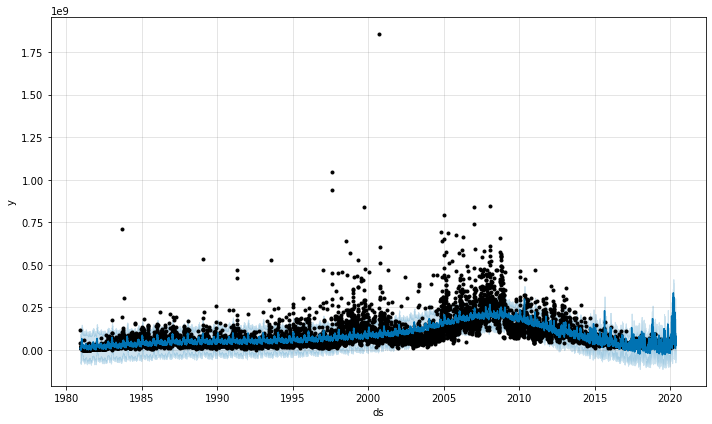

In [ ]:
fig1 = model.plot(forecast)

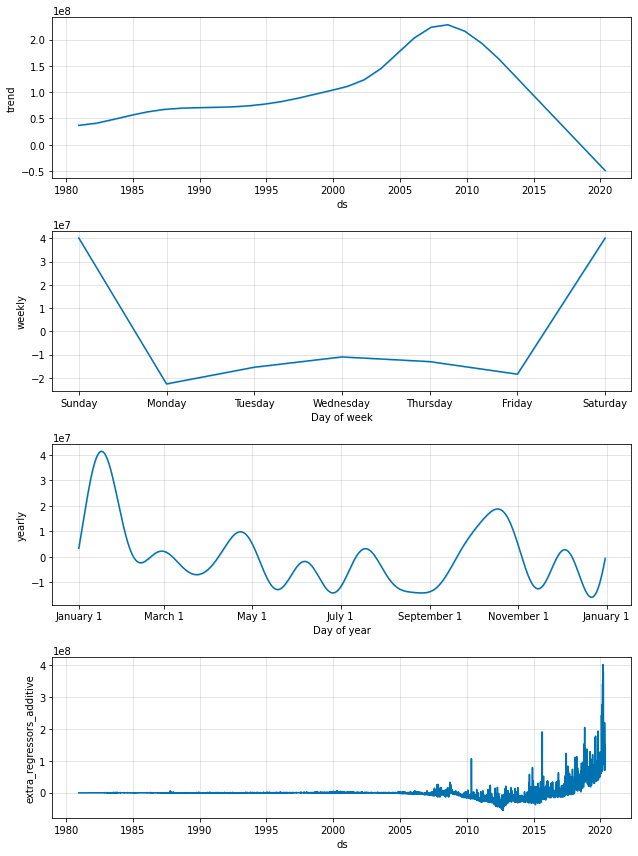

In [ ]:
fig2 = model.plot_components(forecast)